## BSPF Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import obspy as obs

import matplotlib.pyplot as plt

In [2]:
from functions.compute_orthogonal_distance_regression import __compute_orthogonal_distance_regression
from functions.compute_linear_regression import __compute_linear_regression

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [4]:
config = {}

config['path_to_data'] = data_path+"BSPF/data/"

config['path_to_catalogs'] = data_path+"BSPF/data/catalogs/"

config['catalog'] = ""

## Load Data

In [5]:
data_amax = pd.read_pickle(config['path_to_data']+"bspf_analysisdata_amax.pkl")

data_snr = pd.read_pickle(config['path_to_data']+"bspf_analysisdata_snr.pkl")

## Modify Data

In [6]:
# data['RPFO_H'] = np.sqrt(data.RPFO_BJN_Amax**2 + data.RPFO_BJE_Amax**2)
# data['PFO_H'] = np.sqrt(data.PFO_BHN_Amax**2 + data.PFO_BHE_Amax**2)
# data['BSPF_H'] = np.sqrt(data.BSPF_HJN_Amax**2 + data.BSPF_HJE_Amax**2)

Filter data

In [7]:
data_amax_cosum_6 = data_amax[data_amax.CoincidenceSum == 6]

data_snr_cosum_6 = data_snr[data_snr.CoincidenceSum == 6]

In [8]:
data_amax_cosum_6

,Torigin,Magnitude,CoincidenceSum,BAZ,Edistance,Hdistance,BSPF__E_amax,BSPF__N_amax,BSPF__R_amax,BSPF__T_amax,...,PFO__N_amax,PFO__R_amax,PFO__T_amax,PFO__Z_amax,RPFO_al_E_amax,RPFO_al_N_amax,RPFO_al_Z_amax,RPFO_in_E_amax,RPFO_in_N_amax,RPFO_in_Z_amax
1,2022-10-01 21:26:43.530,2.08,6.0,147.912150,48.053535,50.379154,2.566821e-04,0.000699,0.000744,0.000266,...,7.412337e-09,8.997272e-09,1.150963e-07,8.038086e-08,8.404459e-08,6.170297e-07,9.088182e-07,8.634525e-07,6.649280e-07,4.407157e-07
2,2022-10-02 03:25:16.440,1.49,6.0,19.364710,14.850966,16.887652,1.419563e-03,0.000739,0.000691,0.001445,...,1.450219e-08,2.185044e-08,3.365109e-07,1.296634e-07,4.956403e-07,1.892646e-06,5.850636e-06,4.906701e-06,3.606059e-06,1.951387e-06
3,2022-10-02 15:51:37.180,1.68,6.0,339.780826,15.423592,17.486703,3.876863e-04,0.000716,0.000692,0.000318,...,1.378080e-08,6.680220e-09,1.185010e-07,1.150173e-07,9.742342e-08,9.463578e-07,1.073377e-06,1.019430e-06,8.621306e-07,4.915139e-07
4,2022-10-02 21:52:54.280,0.99,6.0,19.790278,14.772415,17.645021,3.598888e-04,0.000203,0.000225,0.000314,...,4.273131e-09,6.563405e-09,1.184679e-07,3.035291e-08,1.146069e-07,5.344302e-07,1.725434e-06,1.191501e-06,1.269653e-06,7.902728e-07
7,2022-10-04 22:33:48.370,1.00,6.0,18.764203,14.250442,17.443586,3.802193e-04,0.000206,0.000291,0.000339,...,4.738706e-09,6.164840e-09,8.833924e-08,2.285628e-08,8.040304e-08,5.890763e-07,1.536918e-06,1.525014e-06,8.233301e-07,4.311782e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023-06-03 13:30:20.310,1.76,6.0,349.177374,28.718595,31.823290,1.051387e-06,0.000002,0.000002,0.000001,...,4.336263e-04,4.138302e-04,4.790305e-04,3.931743e-04,2.312012e-09,3.584577e-09,2.856956e-09,2.879165e-08,2.137980e-08,2.681703e-08
275,2023-06-05 17:22:02.350,1.95,6.0,160.947747,44.700153,46.874255,1.306934e-06,0.000002,0.000002,0.000001,...,7.950755e-04,7.776404e-04,6.544036e-04,5.618957e-04,4.368248e-09,6.951480e-09,6.691850e-09,5.331976e-08,4.679060e-08,7.044056e-08
276,2023-06-05 17:22:15.270,1.54,6.0,160.897319,44.870122,47.560706,9.103963e-07,0.000002,0.000001,0.000001,...,3.503868e-04,4.130384e-04,3.453268e-04,2.138932e-04,1.013239e-09,1.149145e-09,8.920591e-10,7.675631e-09,1.845948e-08,8.665784e-09
279,2023-06-07 06:03:42.030,2.58,6.0,130.780515,60.123060,60.557410,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plots

In [18]:
def __makeplot(data1, data2, data3, data4):

    import matplotlib

    fig, ax = plt.subplots(1,1,figsize=(15,5))
    
    font=14
    
    cmap = plt.get_cmap("viridis", 4)
    
    dat = np.log10(data4.BSPF__Z_snr)
    
    
    ax.scatter(data1.Hdistance, data1.Magnitude, s=50, color="grey", zorder=1, label="all")

    cax = ax.scatter(data2.Hdistance, data2.Magnitude, s=50, lw=0.5, edgecolors="k",
                     c=dat, cmap=cmap, zorder=2, label="trigger=6")
    
    ax.grid(ls="--", color="grey", alpha=0.6, zorder=0,which="both")
    ax.legend(loc=4, fontsize=font)
    
    ax.set_ylabel("Magnitude", fontsize=font)
    ax.set_xlabel("Hypocenter Distance (km)", fontsize=font)
    
    ax.set_xscale("log")
    ax.set_xlim(left=10)
    
    cbar = plt.colorbar(cax, pad=0.02, ticks=np.linspace(min(dat), max(dat), 5))
    cbar.set_label(r"log$_{10}$(SNR-Z)", fontsize=font)
    cbar.set_clim(0,4)
    
    ax.set_xticks([10, 20, 30, 40, 50, 100])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.show()
    
__makeplot(data_amax, data_amax_cosum_6, data_snr, data_snr_cosum_6)

/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


ValueError: cannot convert float NaN to integer

<Figure size 1080x360 with 2 Axes>

## Polar Plot

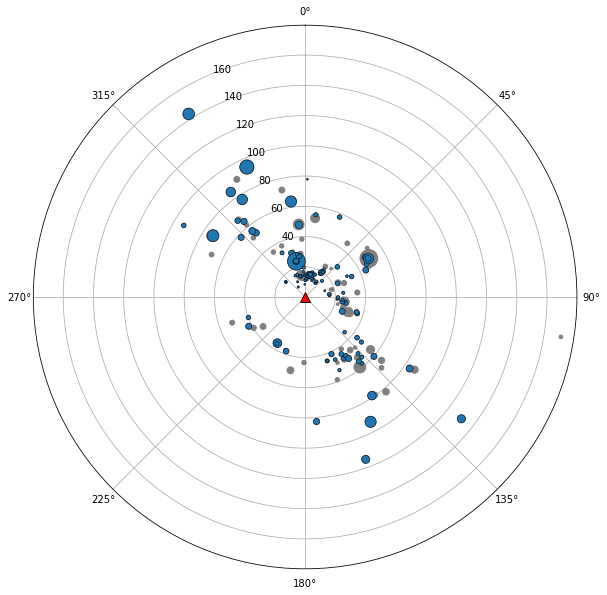

In [10]:
def __polar_polot(data1, data2):
    
    r1 = data1.Edistance
    r2 = data2.Edistance
    theta1 = np.radians(data1.BAZ)
    theta2 = np.radians(data2.BAZ)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
    
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    
    ax.scatter(theta1, r1, s=4**data1.Magnitude, c="grey", zorder=2)
    ax.scatter(theta2, r2, s=4**data2.Magnitude, lw=0.5, edgecolors="k", zorder=3)

    ## station
    ax.scatter(0, 0, zorder=3, s=100, marker='^', c="r", lw=0.8, edgecolors="k")

#     ax.set_rmax(2)
    
#     ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True, zorder=0)

    ax.set_title("", va='bottom')
    plt.show()
    
__polar_polot(data_amax, data_amax_cosum_6)

## Amplitude Maxima

In [31]:
def __makeplot_amax(data1, data2, xvalue):
    
    NJ = 4
    NI = 3
    
    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))
    
    font = 14
    
    scale = 1
    msize = 12
    linew = 0.1
    
    ## _________________________
    
    ax[0,0].scatter(data1[xvalue], data1.PFO__Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2[xvalue], data2.PFO__Z_amax*scale, s=msize, label="XPFO Z", lw=linew, edgecolors="k")
    
    ax[0,1].scatter(data1[xvalue], data1.PFO__N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2[xvalue], data2.PFO__N_amax*scale, s=msize, label="XPFO N", lw=linew, edgecolors="k")
    
    ax[0,2].scatter(data1[xvalue], data1.PFO__E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2[xvalue], data2.PFO__E_amax*scale, s=msize, label="XPFO E", lw=linew, edgecolors="k")
    
    ## _________________________
    
    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_amax*scale, s=msize, label="ADR all Z", lw=linew, edgecolors="k")
    
    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_amax*scale, s=msize, label="ADR all N", lw=linew, edgecolors="k")
    
    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_amax*scale, s=msize, label="ADR all E", lw=linew, edgecolors="k")
    
    ## _________________________
    
    ax[2,0].scatter(data1[xvalue], data1.RPFO_in_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2[xvalue], data2.RPFO_in_Z_amax*scale, s=msize, label="ADR inner Z", lw=linew, edgecolors="k")
    
    ax[2,1].scatter(data1[xvalue], data1.RPFO_in_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2[xvalue], data2.RPFO_in_N_amax*scale, s=msize, label="ADR inner N", lw=linew, edgecolors="k")
    
    ax[2,2].scatter(data1[xvalue], data1.RPFO_in_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2[xvalue], data2.RPFO_in_E_amax*scale, s=msize, label="ADR inner E", lw=linew, edgecolors="k")
    
    ## _________________________
    
    ax[3,0].scatter(data1[xvalue], data1.BSPF__Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,0].scatter(data2[xvalue], data2.BSPF__Z_amax*scale, s=msize, label="BSPF Z", lw=linew, edgecolors="k")

    ax[3,1].scatter(data1[xvalue], data1.BSPF__N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,1].scatter(data2[xvalue], data2.BSPF__N_amax*scale, s=msize, label="BSPF N", lw=linew, edgecolors="k")
    
    ax[3,2].scatter(data1[xvalue], data1.BSPF__E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,2].scatter(data2[xvalue], data2.BSPF__E_amax*scale, s=msize, label="BSPF E", lw=linew, edgecolors="k")
    
    
    
    for i in range(NJ):
        for j in range(NI):
#             ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=4)
            ax[3,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    ax[0,0].set_ylabel(r"Acc. (m/s$^2$)", fontsize=font)
    ax[1,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[2,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[3,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)

    plt.show()

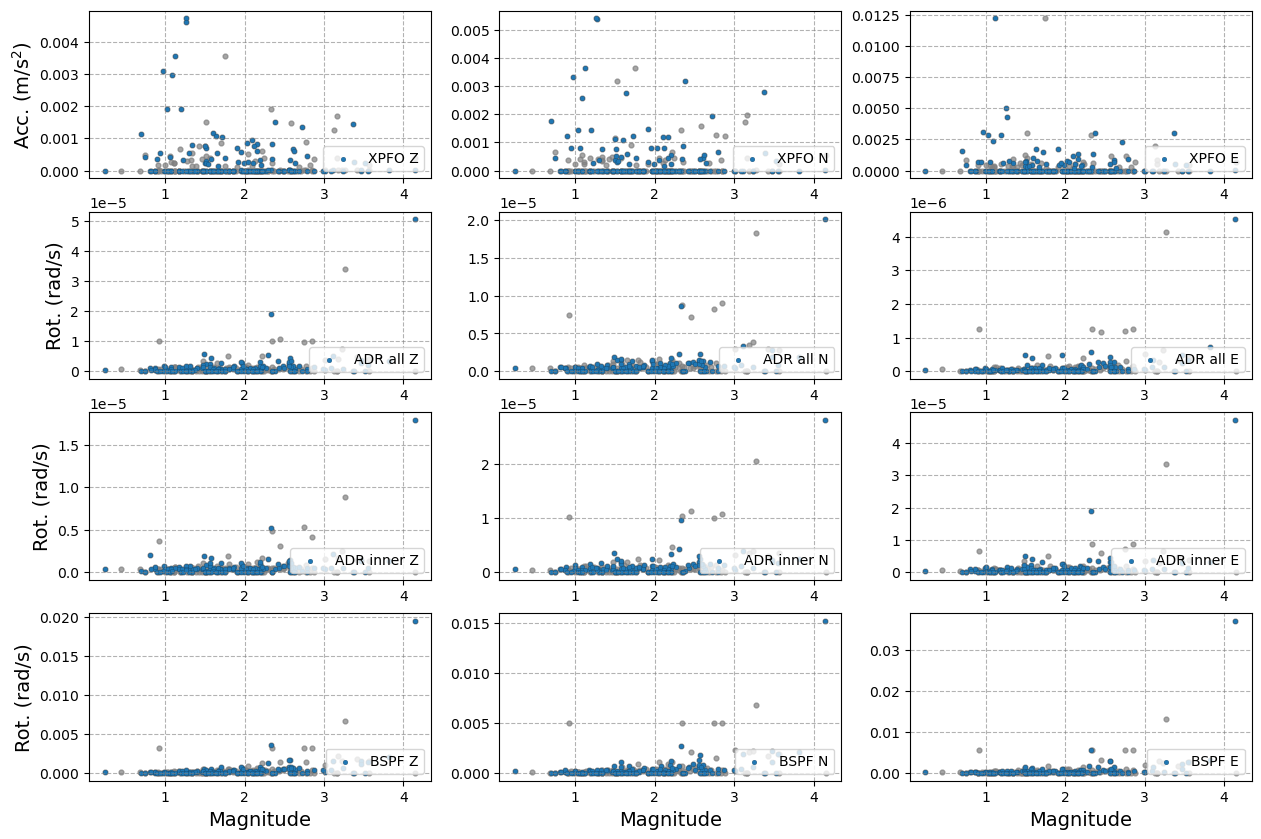

In [32]:
__makeplot_amax(data_amax, data_amax_cosum_6, "Magnitude")

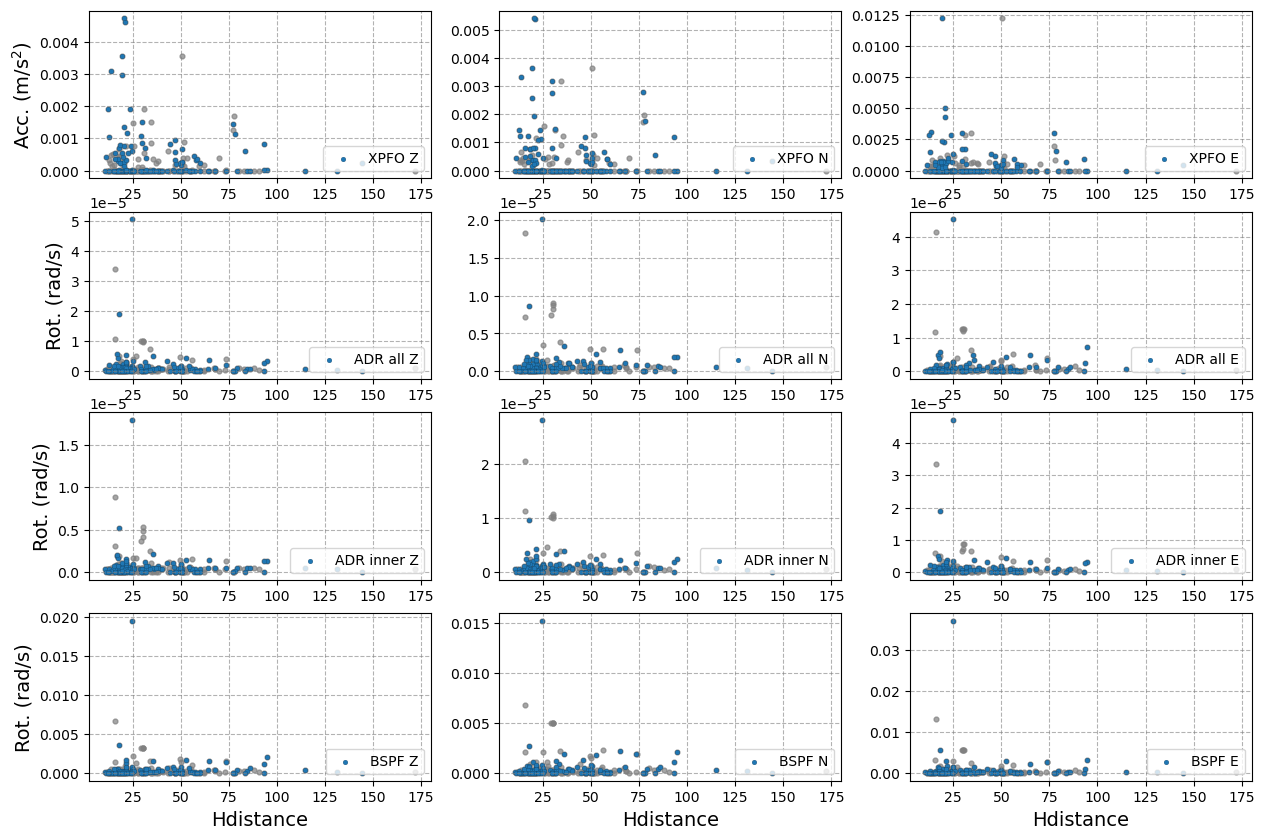

In [33]:
__makeplot_amax(data_amax, data_amax_cosum_6, "Hdistance")

## Compare ADR - BSPF maximal amplitudes

In [56]:
def __makeplot_compare_amax(data1, data2):
    
    NJ = 2
    NI = 3
    
    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))
    
    font = 14
    
    scale = 1e0
    msize = 12
    linew = 0.1
    
    ## _________________________
    
    ax[0,0].scatter(data1.BSPF__Z_amax, data1.RPFO_in_Z_amax, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2.BSPF__Z_amax, data2.RPFO_in_Z_amax, s=msize, color="tab:red", label="RPFO inner Z", lw=linew, edgecolors="k")
    
    ax[0,1].scatter(data1.BSPF__N_amax, data1.RPFO_in_N_amax, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2.BSPF__N_amax, data2.RPFO_in_N_amax, s=msize, color="tab:red", label="RPFO inner N", lw=linew, edgecolors="k")
    
    ax[0,2].scatter(data1.BSPF__E_amax, data1.RPFO_in_E_amax, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2.BSPF__E_amax, data2.RPFO_in_E_amax, s=msize, color="tab:red", label="RPFO inner E", lw=linew, edgecolors="k")
    
    ## _________________________
    
    ax[1,0].scatter(data1.BSPF__Z_amax, data1.RPFO_al_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2.BSPF__Z_amax, data2.RPFO_al_Z_amax*scale, s=msize, color="tab:red", label="ADR all Z", lw=linew, edgecolors="k")
    
    ax[1,1].scatter(data1.BSPF__N_amax, data1.RPFO_al_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2.BSPF__N_amax, data2.RPFO_al_N_amax*scale, s=msize, color="tab:red", label="ADR all N", lw=linew, edgecolors="k")
    
    ax[1,2].scatter(data1.BSPF__E_amax, data1.RPFO_al_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2.BSPF__E_amax, data2.RPFO_al_E_amax*scale, s=msize, color="tab:red", label="ADR all E", lw=linew, edgecolors="k")
    
    
    
    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            ax[i,j].set_xscale("log")
            ax[1,j].set_xlabel(r"BSPF (rad/s)", fontsize=font)

#             ax[i,j].legend(loc=4)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)


    ax[0,0].set_ylabel(r"RPFO inner (rad/s)", fontsize=font)
    ax[1,0].set_ylabel(r"RPFO all (rad/s)", fontsize=font)
    
    plt.show()

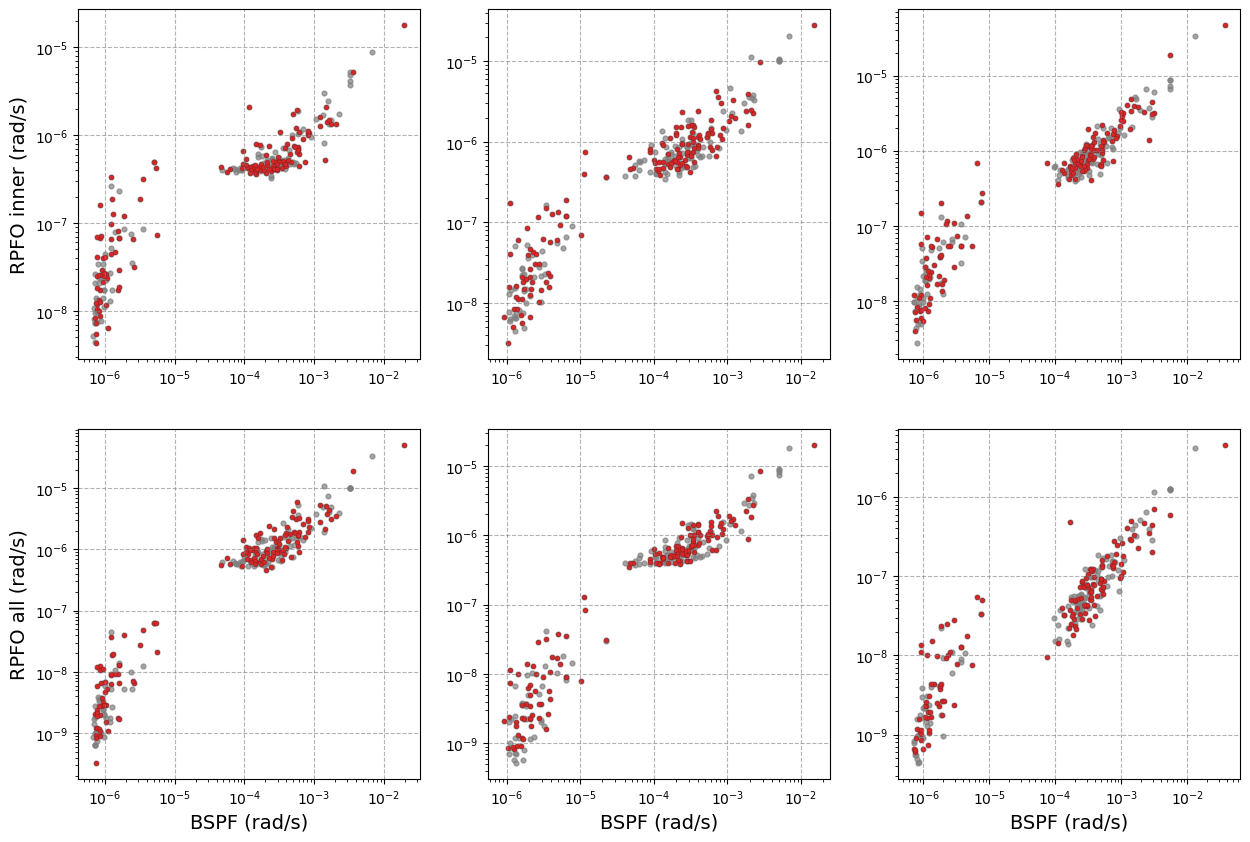

In [57]:
__makeplot_compare_amax(data_amax, data_amax_cosum_6)

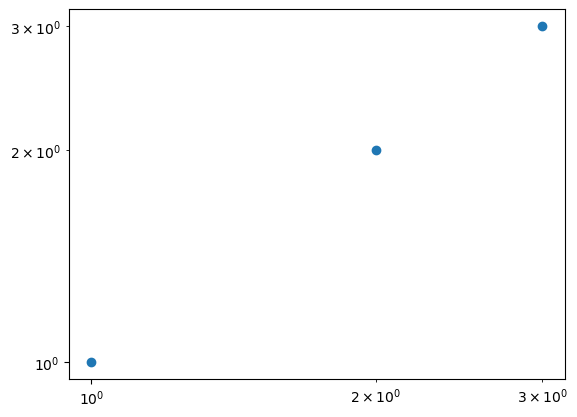

In [52]:
a = [1,2,3]
b = [1,2,3]

plt.scatter(a,b)
plt.xscale("log")
plt.yscale("log")

## Signal-to-Noise Ratio

In [14]:
def __makeplot_snr(data1, data2, xvalue):
    
    NJ = 4
    NI = 3
    
    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))
    
    font = 14
    scale = 1e0
    msize = 12
    
    ## _________________________
    
    ax[0,0].scatter(data1[xvalue], data1.PFO__Z_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2[xvalue], data2.PFO__Z_snr*scale, s=msize, label="XPFO Z")
    
    ax[0,1].scatter(data1[xvalue], data1.PFO__N_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2[xvalue], data2.PFO__N_snr*scale, s=msize, label="XPFO N")
    
    ax[0,2].scatter(data1[xvalue], data1.PFO__E_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2[xvalue], data2.PFO__E_snr*scale, s=msize, label="XPFO E")
    
    ## _________________________
    
    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_snr*scale, s=msize, label="ADR all Z")
    
    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_snr*scale, s=msize, label="ADR all N")
    
    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_snr*scale, s=msize, label="ADR all E")
    
    ## _________________________
    
    ax[2,0].scatter(data1[xvalue], data1.RPFO_in_Z_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2[xvalue], data2.RPFO_in_Z_snr*scale, s=msize, label="ADR inner Z")
    
    ax[2,1].scatter(data1[xvalue], data1.RPFO_in_N_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2[xvalue], data2.RPFO_in_N_snr*scale, s=msize, label="ADR inner N")
    
    ax[2,2].scatter(data1[xvalue], data1.RPFO_in_E_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2[xvalue], data2.RPFO_in_E_snr*scale, s=msize, label="ADR inner E")
    
    ## _________________________
    
    ax[3,0].scatter(data1[xvalue], data1.BSPF__Z_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[3,0].scatter(data2[xvalue], data2.BSPF__Z_snr*scale, s=msize, label="BSPF Z")
    
    ax[3,1].scatter(data1[xvalue], data1.BSPF__N_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[3,1].scatter(data2[xvalue], data2.BSPF__N_snr*scale, s=msize, label="BSPF N")
    
    ax[3,2].scatter(data1[xvalue], data1.BSPF__E_snr*scale, s=msize, color="grey", alpha=0.7)
    ax[3,2].scatter(data2[xvalue], data2.BSPF__E_snr*scale, s=msize, label="BSPF E")
        
    
    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=2)
            ax[3,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].set_ylim(1e-1, 1e4)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)
            
    ax[0,0].set_ylabel(r"SNR", fontsize=font)
    ax[1,0].set_ylabel(r"SNR", fontsize=font)
    ax[2,0].set_ylabel(r"SNR", fontsize=font)
    ax[3,0].set_ylabel(r"SNR", fontsize=font)

    plt.show()

In [1]:
__makeplot_snr(data_snr, data_snr_cosum_6, "Magnitude")

NameError: name '__makeplot_snr' is not defined

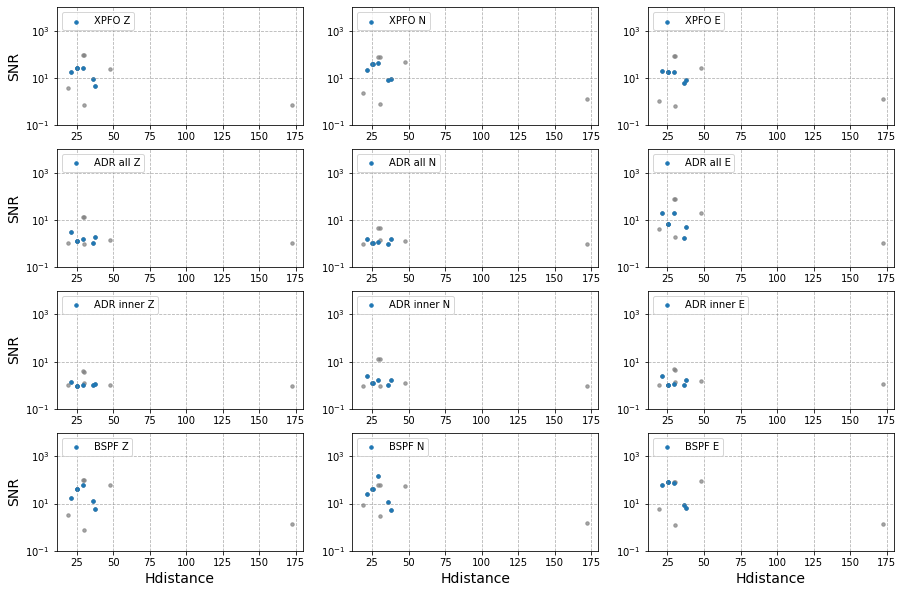

In [16]:
__makeplot_snr(data_snr, data_snr_cosum_6, "Hdistance")

## Velocity

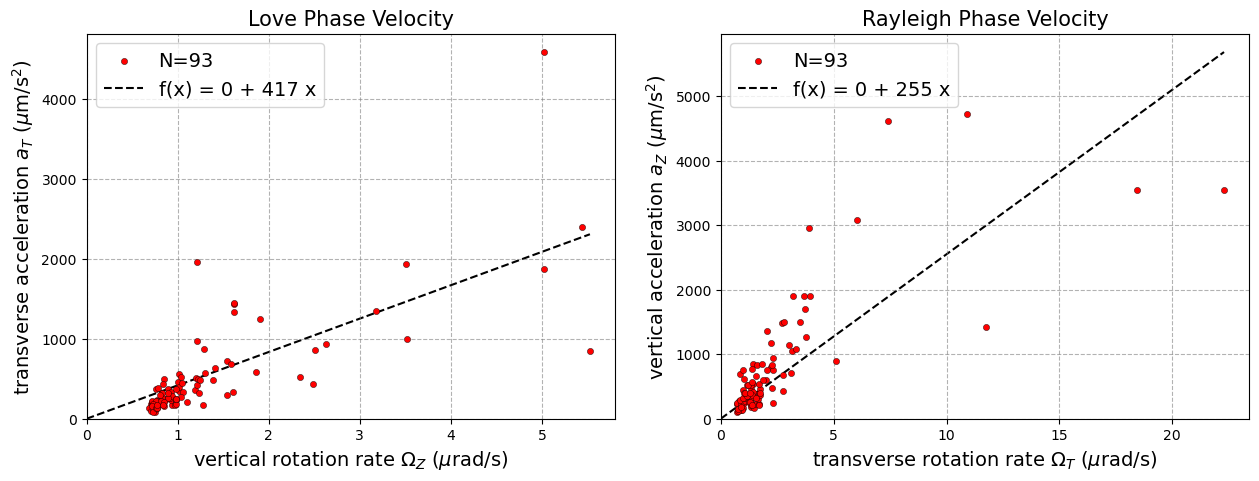

In [20]:
def __makeplot_velocity(data):
    
    from numpy import array, log10
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    font = 14
    
    scale = 1e6
    msize = 10
    linew = 0.3
    
    data0 = data.dropna()

    x_arr1 = data0.BSPF__Z_amax*scale
    y_arr1= 0.5*data0.PFO__T_amax*scale

    xx1 = array([b for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])
    yy1 = array([a for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])
    
#     xx1, yy1 = log10(xx1), log10(yy1)
    
    x_axis1 = np.linspace(0, xx1.max(), 100)


    ## linear regression
#     b1, a1 = __compute_orthogonal_distance_regression(xx1, yy1, xerr=None, yerr=None, bx=None, by=None)
    b1, a1 = __compute_linear_regression(xx1, yy1, intercept_is_zero=True)

    ax[0].scatter(xx1, yy1, s=20, c='r', marker="o", label=f"N={len(xx1)}", zorder=3, lw=linew, edgecolors="k")
    ax[0].plot(x_axis1, a1+b1*x_axis1, color='k', ls="--", label=f"f(x) = {a1:.0f} + {b1:.0f} x", zorder=1)
     
    ax[0].legend(loc=2, fontsize=font)
    ax[0].grid(ls="--", color="grey", alpha=0.6, zorder=0)
    
    ax[0].set_xlim(left=0)
    ax[0].set_ylim(bottom=0)
    
    ax[0].set_xlabel("vertical rotation rate $\Omega_Z$ ($\mu$rad/s)", fontsize=font)
    ax[0].set_ylabel("transverse acceleration $a_T$ ($\mu$m/s$^2$)", fontsize=font)
    ax[0].set_title("Love Phase Velocity", fontsize=font+1)
    
    
    ## ______________________________________________

    x_arr2 = data0.BSPF__T_amax*scale
    y_arr2= data0.PFO__Z_amax*scale

    xx2 = array([b for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])
    yy2 = array([a for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])
    
#     xx2, yy2 = log10(xx2), log10(yy2)
    
    x_axis2 = np.linspace(0, xx2.max(), 100)

    ## linear regression
#     b2, a2 = __compute_orthogonal_distance_regression(xx2, yy2, xerr=None, yerr=None, bx=None, by=None)
    b2, a2 = __compute_linear_regression(xx2, yy2, intercept_is_zero=True)

    ax[1].scatter(xx2, yy2, s=20, c='r' ,marker="o", label=f"N={len(xx2)}", zorder=3, lw=linew, edgecolors="k")
    ax[1].plot(x_axis2, a2+b2*x_axis2, color='k', ls="--", label=f"f(x) = {a2:.0f} + {b2:.0f} x", zorder=1)
    
    ax[1].legend(loc=2, fontsize=font)
    ax[1].grid(ls="--", color="grey", alpha=0.6, zorder=0)
    
    ax[1].set_xlim(left=0)
    ax[1].set_ylim(bottom=0)

    ax[1].set_xlabel("transverse rotation rate $\Omega_T$ ($\mu$rad/s)", fontsize=font)
    ax[1].set_ylabel("vertical acceleration $a_Z$ ($\mu$m/s$^2$)", fontsize=font)
    ax[1].set_title("Rayleigh Phase Velocity", fontsize=font+1)
    
    plt.show();
    
__makeplot_velocity(data_amax)